In [1]:
%matplotlib inline

import sys
sys.path.append('../')

from agentsClasses.OfflineQLearningClass import OfflineQLearningAgent
from utilities.plots import create_grids, plot_trajectory

In [2]:
#Hyperparameters
show_stats = True       # show stats
render = True           # render the results after training

NUM_AGENTS = 1

SHAPE = "14x14"             # "5x5" or "14x14"

if SHAPE == "5x5":
    N_MODELS = 9
    EPISODES_PER_AGENT = 1000
    MAX_STEPS_PER_EPISODE = 300
elif SHAPE == "14x14":
    N_MODELS = 7
    EPISODES_PER_AGENT = 3000
    MAX_STEPS_PER_EPISODE = 300

REWARD = [1, -100, 0.55]     #REARD, PENALTY, PENALTY_THRESHOLD

EPS_START = 1.0
EPS_DECAY = EPS_START/(EPISODES_PER_AGENT/2)  # reduce the exploration over time
EPS_END = 0.1

DISCOUNT_FACTOR = 0.95
LR = 0.02

In [3]:
#CREATING AND TRAINING THE AGENTS
agents_arr = []

print("Starting training of", NUM_AGENTS, "Q-learning agents")

for i in range(NUM_AGENTS):
    print("Agent", i+1, "/", NUM_AGENTS)
    agent = OfflineQLearningAgent(i, SHAPE, N_MODELS, EPISODES_PER_AGENT, MAX_STEPS_PER_EPISODE, REWARD, LR, EPS_START, EPS_DECAY, EPS_END, DISCOUNT_FACTOR)
    
    agent.train()
    agents_arr.append(agent)

Starting training of 1 Q-learning agents
Agent 1 / 1
Loading models...
Models loaded


100%|██████████| 3000/3000 [20:42<00:00,  2.41it/s]


La longitud estimada para el eje X del training error es: 900000


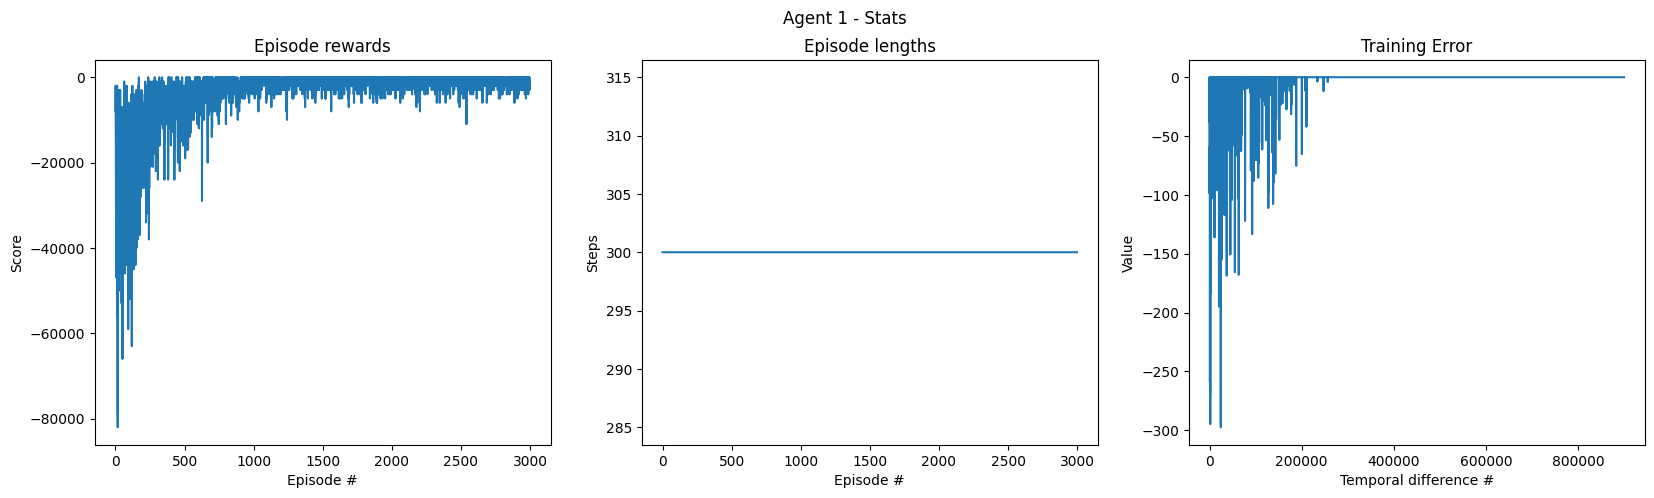

In [4]:
if show_stats:
    for agent in agents_arr:
        print("La longitud estimada para el eje X del training error es:", agent.total_steps)
        agent.plot_results(rolling_length=1, rolling_error=50)

In [5]:
for agent in agents_arr:
    value_grid, policy_grid, string_policy_grid = create_grids(agent.env, agent=agent)
    start_pos = agent.env.unwrapped.start_pos

    if render:
        plot_trajectory(string_policy_grid, start_pos, agent.id+1)

Esta parte es para almacenar todas las transiciones en las que la recompensa fue negativa:

In [ ]:
#Hay muchos elementos en el rewardHistory que son iguales, quiero que solo haya uno de cada
#historico = dict.fromkeys(agent.env.unwrapped.rewardHistory)

print(len(agent.env.unwrapped.rewardHistory))

unicos = []

for i in agent.env.unwrapped.rewardHistory:

    stringo = str(i[0][0]) + ',' + str(i[0][1]) + ',' + str(i[1]) + ',' + str(i[2][0]) + ',' + str(i[2][1])
    
    if stringo not in unicos:
        unicos.append(stringo)

for stringo in unicos:
    print(stringo)


1404
13,0,3,14,1
